In [1]:
import numpy as np 
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [3]:
df=pd.read_csv("twitter_training.csv",names=["id","company","kind","tweet"])
df.head()

,id,company,kind,tweet
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74682 entries, 0 to 74681
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   id       74682 non-null  int64 
 1   company  74682 non-null  object
 2   kind     74682 non-null  object
 3   tweet    73996 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


In [5]:
df['company'].head()
df=df.dropna()

In [6]:
df.isnull().sum()

id         0
company    0
kind       0
tweet      0
dtype: int64

In [7]:
vc_df = pd.DataFrame(df['kind'].value_counts()).reset_index()
vc_df.columns = ['kind', 'Count'] 
vc_df

,kind,Count
0,Negative,22358
1,Positive,20655
2,Neutral,18108
3,Irrelevant,12875


In [8]:
df['twt'] = df['tweet'].str.replace("[^a-zA-Z0-9]", " ")
df = df[["company","kind","tweet","twt"]]
df.head()

,company,kind,tweet,twt
0,Borderlands,Positive,im getting on borderlands and i will murder yo...,im getting on borderlands and i will murder yo...
1,Borderlands,Positive,I am coming to the borders and I will kill you...,I am coming to the borders and I will kill you...
2,Borderlands,Positive,im getting on borderlands and i will kill you ...,im getting on borderlands and i will kill you ...
3,Borderlands,Positive,im coming on borderlands and i will murder you...,im coming on borderlands and i will murder you...
4,Borderlands,Positive,im getting on borderlands 2 and i will murder ...,im getting on borderlands 2 and i will murder ...


In [9]:
type(df['twt'])

pandas.core.series.Series

In [10]:
df['twt'] = df['twt'].apply(lambda row:' '.join([word for word in row.split() if len(word)>2]))
df.head()

,company,kind,tweet,twt
0,Borderlands,Positive,im getting on borderlands and i will murder yo...,getting borderlands and will murder you all
1,Borderlands,Positive,I am coming to the borders and I will kill you...,coming the borders and will kill you all
2,Borderlands,Positive,im getting on borderlands and i will kill you ...,getting borderlands and will kill you all
3,Borderlands,Positive,im coming on borderlands and i will murder you...,coming borderlands and will murder you all
4,Borderlands,Positive,im getting on borderlands 2 and i will murder ...,getting borderlands and will murder you all


In [11]:
df['twt'] = [review.lower() for review in df['twt']]
df.head()

,company,kind,tweet,twt
0,Borderlands,Positive,im getting on borderlands and i will murder yo...,getting borderlands and will murder you all
1,Borderlands,Positive,I am coming to the borders and I will kill you...,coming the borders and will kill you all
2,Borderlands,Positive,im getting on borderlands and i will kill you ...,getting borderlands and will kill you all
3,Borderlands,Positive,im coming on borderlands and i will murder you...,coming borderlands and will murder you all
4,Borderlands,Positive,im getting on borderlands 2 and i will murder ...,getting borderlands and will murder you all


In [12]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk import word_tokenize

stop_words = stopwords.words('english')
def remove_stopwords(rev):
    review_tokenized = word_tokenize(rev)
    rev_new = " ".join([i for i in review_tokenized  if i not in stop_words])
    return rev_new
df['twt'] = [remove_stopwords(r) for r in df['twt']]

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\vises\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\vises\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [13]:
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
lemmatizer = WordNetLemmatizer()
def nltk_tag_to_wordnet_tag(nltk_tag):
    if nltk_tag.startswith('J'):
        return wordnet.ADJ
    elif nltk_tag.startswith('V'):
        return wordnet.VERB
    elif nltk_tag.startswith('N'):
        return wordnet.NOUN
    elif nltk_tag.startswith('R'):
        return wordnet.ADV
    else:          
        return None
def lemmatize_sentence(sentence):
    nltk_tagged = nltk.pos_tag(nltk.word_tokenize(sentence))
    wordnet_tagged = map(lambda x: (x[0], nltk_tag_to_wordnet_tag(x[1])), nltk_tagged)
    lemmatized_sentence = []
    for word, tag in wordnet_tagged:
        if tag is None:
            lemmatized_sentence.append(word)
        else:        
            #else use the tag to lemmatize the token
            lemmatized_sentence.append(lemmatizer.lemmatize(word, tag))
    return " ".join(lemmatized_sentence)


df['twt'] = df['twt'].apply(lambda x: lemmatize_sentence(x))

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\vises\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\vises\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\vises\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


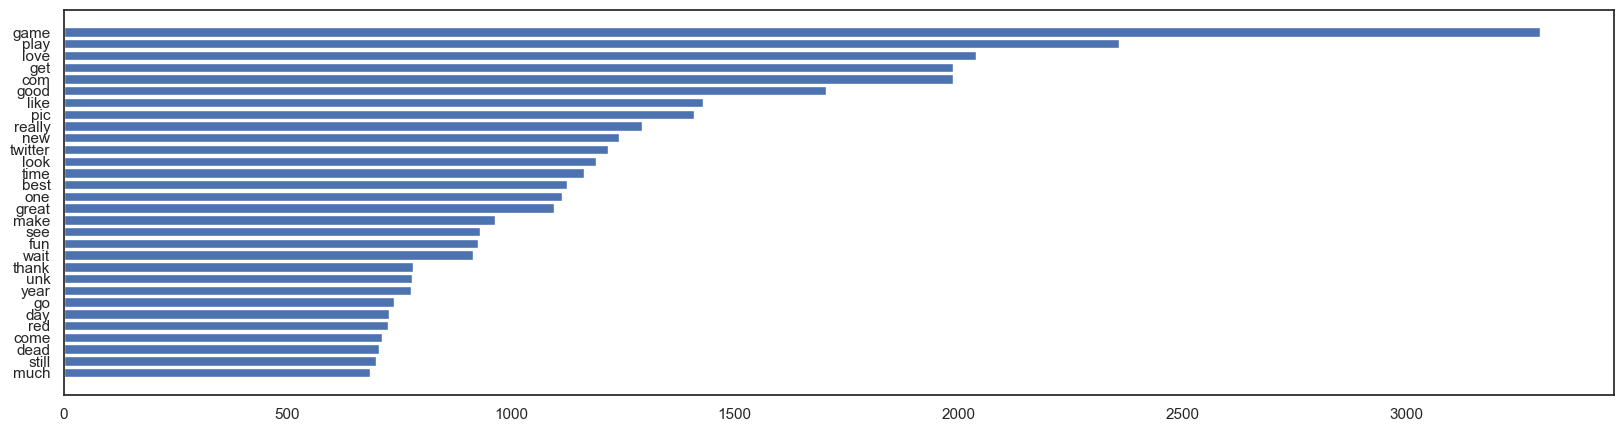

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style = 'white')
from nltk import FreqDist #function to find the frequent words in the data

# Subset positive review dataset
all_words_df = df.loc[df['kind'] == 'Positive',:]

#Extracts words into list and count frequency
all_words = ' '.join([text for text in all_words_df['twt']])
all_words = all_words.split()
words_df = FreqDist(all_words)

# Extracting words and frequency from words_df object
words_df = pd.DataFrame({'word':list(words_df.keys()), 'count':list(words_df.values())})
words_df
# Subsets top 30 words by frequency
words_df = words_df.nlargest(columns="count", n = 30) 

words_df.sort_values('count', inplace = True)

# Plotting 30 frequent words
plt.figure(figsize=(20,5))
ax = plt.barh(words_df['word'], width = words_df['count'])
plt.show()

In [15]:
!pip install wordcloud

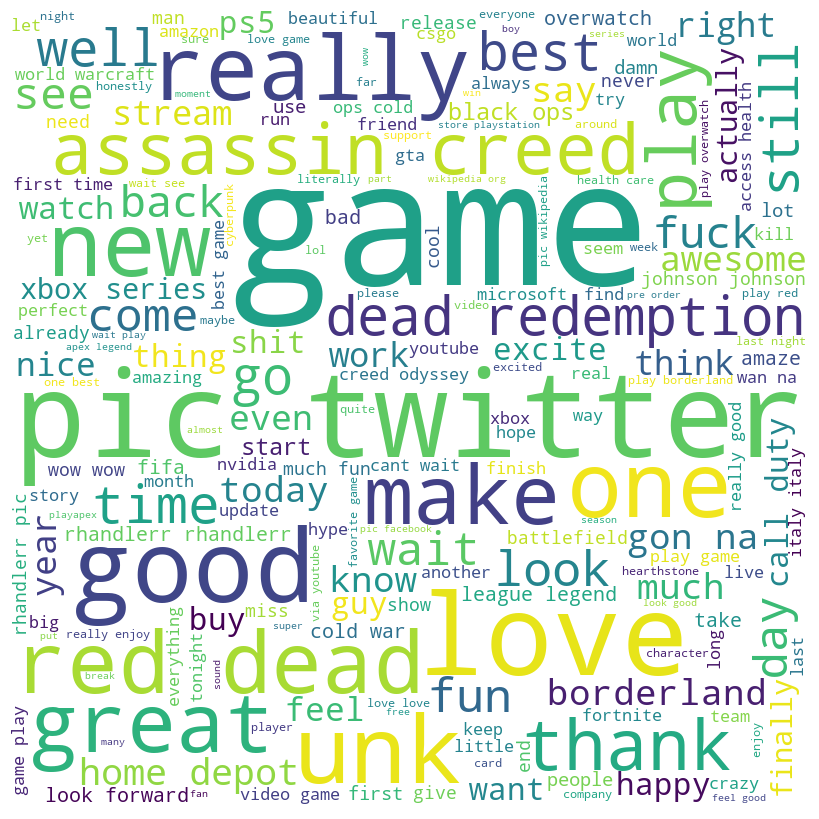

In [16]:
from wordcloud import WordCloud
word_cloud_df = df.loc[df['kind'] == 'Positive',:]
all_words = ' '.join([text for text in word_cloud_df['twt']])
 

wordcloud = WordCloud(width = 800, height = 800, 
                      background_color ='white', 
                      min_font_size = 10).generate(all_words)

#plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show()

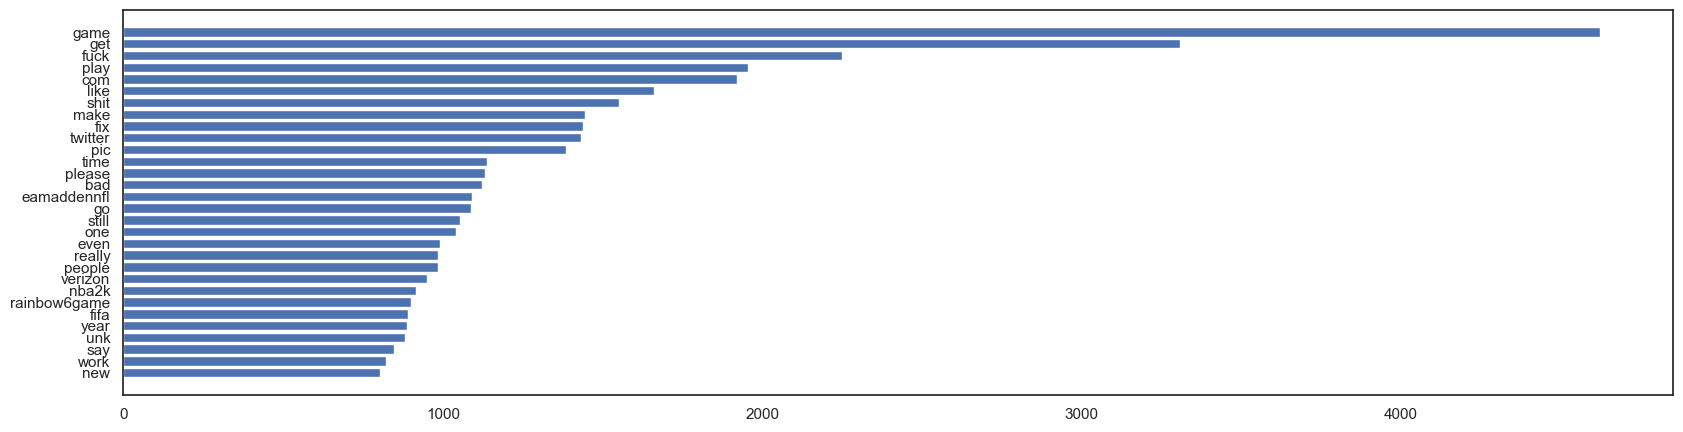

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style = 'white')
from nltk import FreqDist #function to find the frequent words in the data

# Subset positive review dataset
all_words_df = df.loc[df['kind'] == 'Negative',:]

#Extracts words into list and count frequency
all_words = ' '.join([text for text in all_words_df['twt']])
all_words = all_words.split()
words_df = FreqDist(all_words)

# Extracting words and frequency from words_df object
words_df = pd.DataFrame({'word':list(words_df.keys()), 'count':list(words_df.values())})
words_df
# Subsets top 30 words by frequency
words_df = words_df.nlargest(columns="count", n = 30) 

words_df.sort_values('count', inplace = True)

# Plotting 30 frequent words
plt.figure(figsize=(20,5))
ax = plt.barh(words_df['word'], width = words_df['count'])
plt.show()

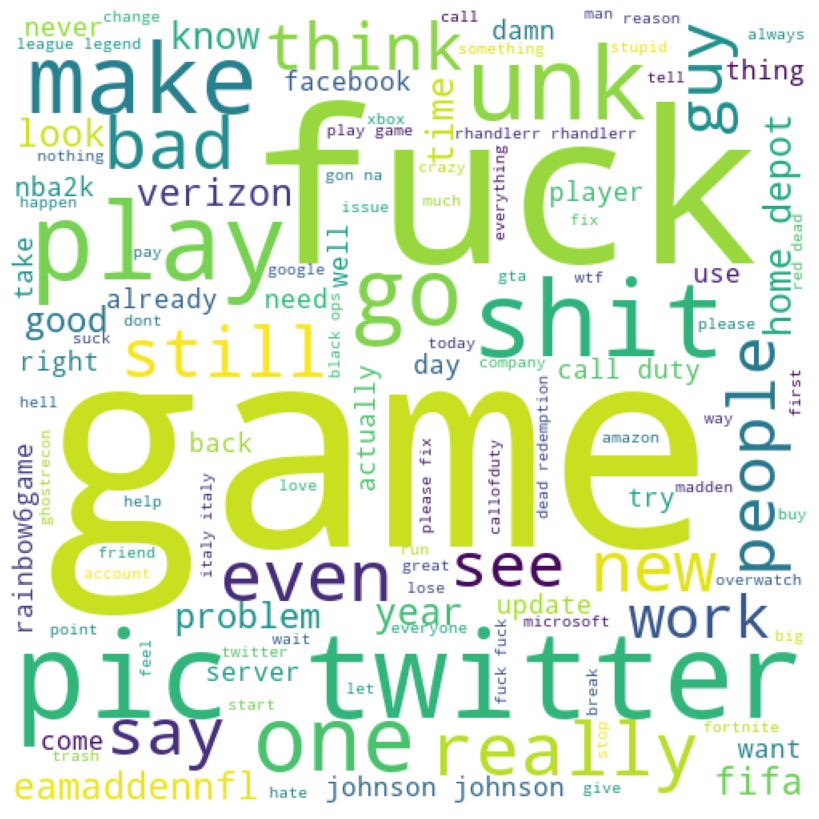

In [18]:
from wordcloud import WordCloud
word_cloud_df = df.loc[df['kind'] == 'Negative',:]
all_words = ' '.join([text for text in word_cloud_df['twt']])
 

wordcloud = WordCloud(width = 500, height = 500, 
                      background_color ='white', 
                      min_font_size = 10).generate(all_words)

#plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show()

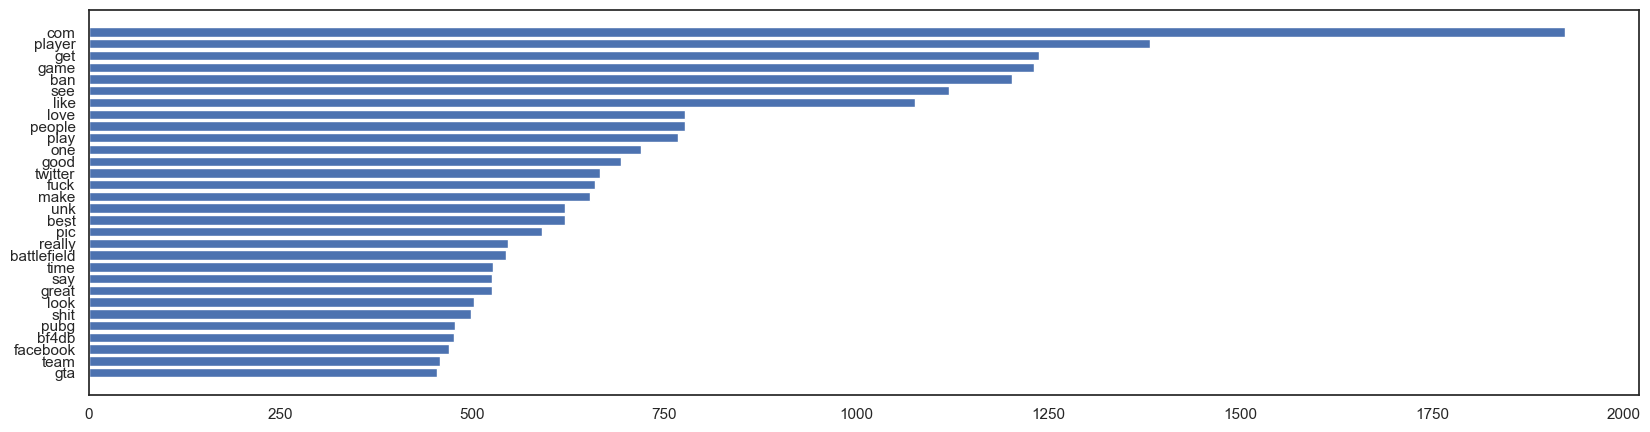

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style = 'white')
from nltk import FreqDist #function to find the frequent words in the data

# Subset positive review dataset
all_words_df = df.loc[df['kind'] == 'Irrelevant',:]

#Extracts words into list and count frequency
all_words = ' '.join([text for text in all_words_df['twt']])
all_words = all_words.split()
words_df = FreqDist(all_words)

# Extracting words and frequency from words_df object
words_df = pd.DataFrame({'word':list(words_df.keys()), 'count':list(words_df.values())})
words_df
# Subsets top 30 words by frequency
words_df = words_df.nlargest(columns="count", n = 30) 

words_df.sort_values('count', inplace = True)

# Plotting 30 frequent words
plt.figure(figsize=(20,5))
ax = plt.barh(words_df['word'], width = words_df['count'])
plt.show()

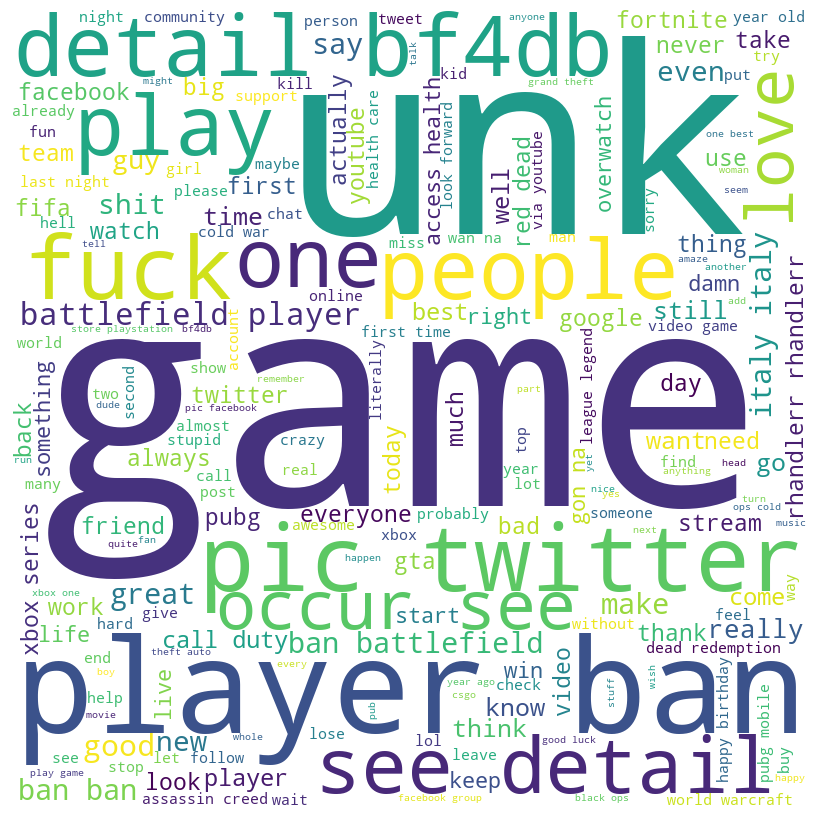

In [20]:
from wordcloud import WordCloud
word_cloud_df = df.loc[df['kind'] == 'Irrelevant',:]
all_words = ' '.join([text for text in word_cloud_df['twt']])
 

wordcloud = WordCloud(width = 800, height = 800, 
                      background_color ='white', 
                      min_font_size = 10).generate(all_words)

#plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show()

In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=2500)

In [22]:
df['kind']=df['kind'].map({'Positive':1, 'Neutral':2, 'Negative':0, 'Irrelevant':3})

In [23]:
X = tfidf.fit_transform(df['twt']).toarray()
y = df['kind'].values
featureNames = tfidf.get_feature_names()

# Splitting the dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=30)

In [24]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)

y_pred = dt.predict(X_test)

In [25]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, dt.predict_proba(X_test),multi_class="ovo")

0.9296296296296296

In [20]:
X = tfidf.fit_transform(df['twt']).toarray()
y = df["kind"].values

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=50, max_features="auto")
rf_model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=50)

In [22]:
predictions = rf_model.predict(X_test)
predictions

array([1, 1, 0, ..., 0, 3, 2], dtype=int64)

In [23]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, rf_model.predict_proba(X_test),multi_class="ovo")

0.9710502992714677

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
from sklearn.linear_model import LogisticRegression

In [64]:
lr = LogisticRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

In [26]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, lr.predict_proba(X_test),multi_class="ovo")

0.8541286536286741

In [27]:
featureImportance = pd.DataFrame({i : j for i,j in zip(rf_model.feature_importances_,featureNames)}.items(),columns = ['Importance','word'])
featureImportance.sort_values(by='Importance',ascending=False)

,Importance,word
457,0.011690,com
1321,0.009658,love
931,0.007085,fuck
880,0.007025,fix
944,0.006515,game
...,...,...
833,0.000007,fang
1660,0.000006,poverty
1030,0.000004,hakusho
2157,0.000001,symmetric


In [60]:
import pickle

In [61]:
pickle.dump(rf_model,open('final.pkl','wb'))